## Prob5.7(a)

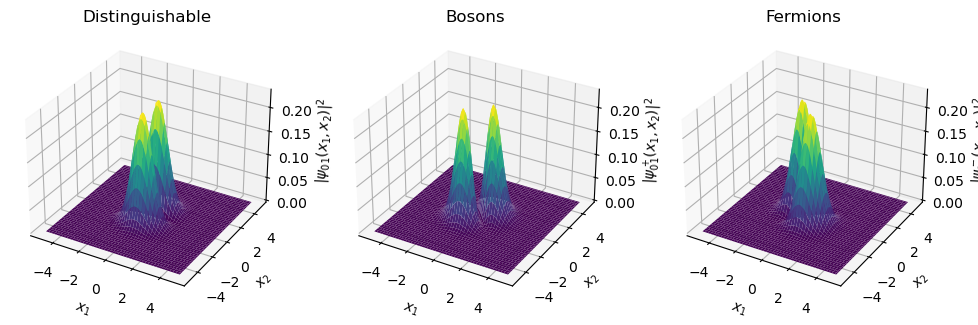

In [1]:
# 导入所需的库
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite

# 定义常数
m = 1 # 质量
omega = 1 # 频率
hbar = 1 # 约化普朗克常数
N = 100 # 网格点数
L = 5 # 空间范围

# 定义单粒子波函数
def psi(n,x):
    return (m*omega/(np.pi*hbar))**(1/4) * 1/np.sqrt(2**n * np.math.factorial(n)) * hermite(n)(np.sqrt(m*omega/hbar)*x) * np.exp(-m*omega*x**2/(2*hbar))

# 定义双粒子波函数
def psi01(x1,x2):
    return psi(0,x1)*psi(1,x2)

def psi01p(x1,x2):
    return 1/np.sqrt(2) * (psi(0,x1)*psi(1,x2) + psi(0,x2)*psi(1,x1))

def psi01m(x1,x2):
    return 1/np.sqrt(2) * (psi(0,x1)*psi(1,x2) - psi(0,x2)*psi(1,x1))

# 定义空间网格
x = np.linspace(-L,L,N)
x1,x2 = np.meshgrid(x,x)

# 计算波函数的模方
Z01 = np.abs(psi01(x1,x2))**2
Z01p = np.abs(psi01p(x1,x2))**2
Z01m = np.abs(psi01m(x1,x2))**2

# 绘制三维图像
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(x1,x2,Z01,cmap='viridis')
ax1.set_title('Distinguishable')
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_zlabel('$|\psi_{01}(x_1,x_2)|^2$')
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(x1,x2,Z01p,cmap='viridis')
ax2.set_title('Bosons')
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_zlabel('$|\psi_{01}^+(x_1,x_2)|^2$')
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(x1,x2,Z01m,cmap='viridis')
ax3.set_title('Fermions')
ax3.set_xlabel('$x_1$')
ax3.set_ylabel('$x_2$')
ax3.set_zlabel('$|\psi_{01}^-(x_1,x_2)|^2$')
plt.show()


## Prob5.7(c)

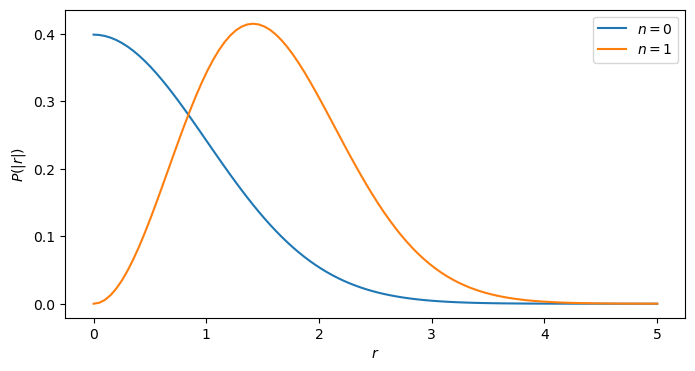

In [2]:
# 导入所需的库
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite

# 定义常数
m = 1 # 质量
omega = 1 # 频率
hbar = 1 # 约化普朗克常数
N = 100 # 网格点数
L = 5 # 空间范围

# 定义概率分布函数
def P(r,n):
    return 1/np.sqrt(2) * (m*omega/(np.pi*hbar))**(1/2) * 1/np.sqrt(2**n * np.math.factorial(n)) * hermite(n)(m*r*omega/(np.sqrt(2)*hbar))**2 * np.exp(-m*omega*r**2/(2*hbar))

# 定义空间网格
r = np.linspace(0,L,N)

# 计算概率分布
P0 = P(r,0)
P1 = P(r,1)

# 绘制二维图像
plt.figure(figsize=(8,4))
plt.plot(r,P0,label='$n=0$')
plt.plot(r,P1,label='$n=1$')
plt.xlabel('$r$')
plt.ylabel('$P(|r|)$')
plt.legend()
plt.show()


## Pro5.7(d)

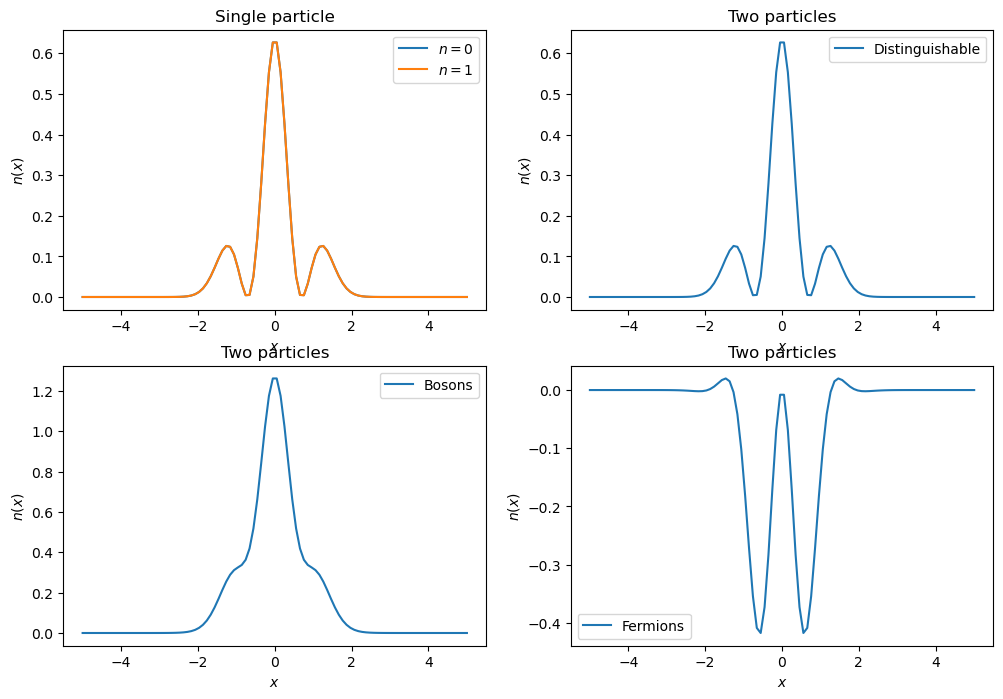

In [5]:
# 导入所需的库
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite

# 定义常数
m = 1 # 质量
omega = 1 # 频率
hbar = 1 # 约化普朗克常数
N = 100 # 网格点数
L = 5 # 空间范围

# 定义单粒子波函数
def psi(n,x):
    return (m*omega/(np.pi*hbar))**(1/4) * 1/np.sqrt(2**n * np.math.factorial(n)) * hermite(n)(np.sqrt(m*omega/hbar)*x) * np.exp(-m*omega*x**2/(2*hbar))

# 定义双粒子波函数
def psi01(x1,x2):
    return psi(0,x1)*psi(1,x2)

def psi01p(x1,x2):
    return 1/np.sqrt(2) * (psi(0,x1)*psi(1,x2) + psi(0,x2)*psi(1,x1))

def psi01m(x1,x2):
    return 1/np.sqrt(2) * (psi(0,x1)*psi(1,x2) - psi(0,x2)*psi(1,x1))

# 定义平均粒子密度
def nx_d(x):
    return 2 * (m*omega/(np.pi*hbar)) * (1-2*m*omega*x**2/hbar)**2 * np.exp(-2*m*omega*x**2/hbar)

def nx_p(x):
    return 2 * (m*omega/(np.pi*hbar)) * (1-2*m*omega*x**2/hbar)**2 * np.exp(-2*m*omega*x**2/hbar) + 2 * (m*omega/(np.pi*hbar)) * np.exp(-m*omega*x**2/hbar)

def nx_m(x):
    return 2 * (m*omega/(np.pi*hbar)) * (1-2*m*omega*x**2/hbar)**2 * np.exp(-2*m*omega*x**2/hbar) - 2 * (m*omega/(np.pi*hbar)) * np.exp(-m*omega*x**2/hbar)

# 定义空间网格
x = np.linspace(-L,L,N)

# 计算平均粒子密度
nd0 = nx_d(x)
nd1 = nx_d(x)
nd01d = nx_d(x)
nd01p = nx_p(x)
nd01m = nx_m(x)

# 绘制二维图像
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.plot(x,nd0,label='$n=0$')
plt.plot(x,nd1,label='$n=1$')
plt.xlabel('$x$')
plt.ylabel('$n(x)$')
plt.legend()
plt.title('Single particle')
plt.subplot(222)
plt.plot(x,nd01d,label='Distinguishable')
plt.xlabel('$x$')
plt.ylabel('$n(x)$')
plt.legend()
plt.title('Two particles')
plt.subplot(223)
plt.plot(x,nd01p,label='Bosons')
plt.xlabel('$x$')
plt.ylabel('$n(x)$')
plt.legend()
plt.title('Two particles')
plt.subplot(224)
plt.plot(x,nd01m,label='Fermions')
plt.xlabel('$x$')
plt.ylabel('$n(x)$')
plt.legend()
plt.title('Two particles')
plt.show()


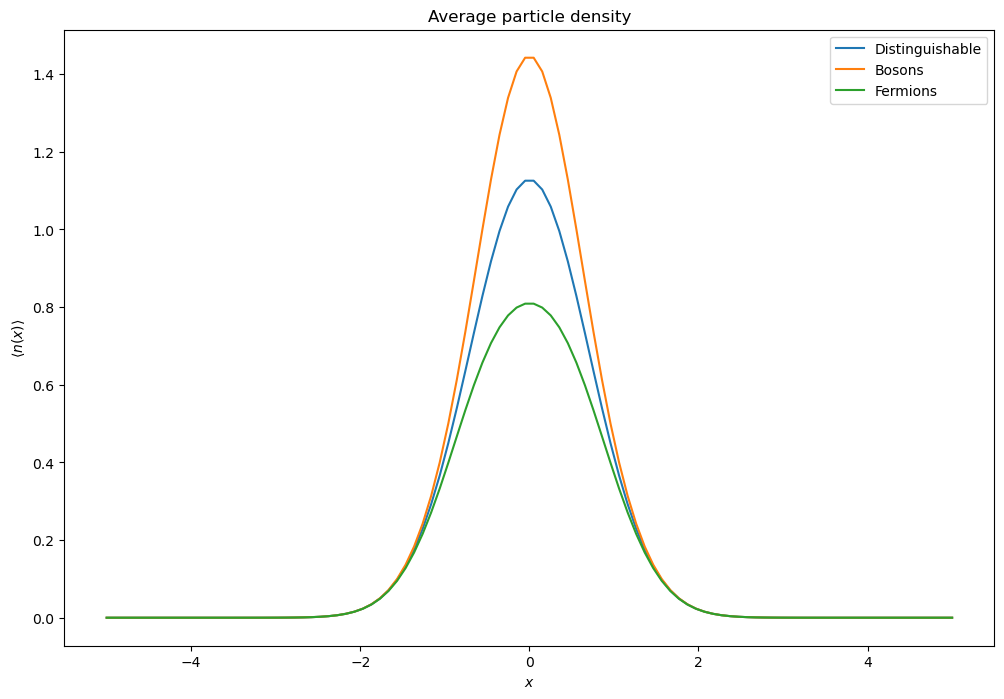

In [8]:
# 导入所需的库
import numpy as np
import matplotlib.pyplot as plt

# 定义常数
m = 1 # 质量
omega = 1 # 频率
hbar = 1 # 约化普朗克常数
N = 100 # 网格点数
L = 5 # 空间范围

# 定义空间网格
x = np.linspace(-L,L,N)

# 计算平均粒子密度
nm = 2 * (m*omega/(np.pi*hbar))**(1/2) * np.exp(-m*omega*x**2/hbar) - (m*omega/(np.pi*hbar)) * np.exp(-2*m*omega*x**2/hbar) # 费米子
nd = 2 * (m*omega/(np.pi*hbar))**(1/2) * np.exp(-m*omega*x**2/hbar) # 可分辨
np = 2 * (m*omega/(np.pi*hbar))**(1/2) * np.exp(-m*omega*x**2/hbar) + (m*omega/(np.pi*hbar)) * np.exp(-2*m*omega*x**2/hbar) # 玻色子


# 绘制二维图像
plt.figure(figsize=(12,8))
plt.plot(x,nd,label='Distinguishable')
plt.plot(x,np,label='Bosons')
plt.plot(x,nm,label='Fermions')
plt.xlabel('$x$')
plt.ylabel('$\\langle n(x)\\rangle$')
plt.legend()
plt.title('Average particle density')
plt.show()
